## Градиентный спуск
<https://neurohive.io/ru/osnovy-data-science/gradient-descent/>

In [2]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации
from sklearn import linear_model #линейные модели
from sklearn import metrics #метрики
plt.style.use('seaborn-v0_8')
%matplotlib inline

In [3]:
column_names = ['CRIM', 'ZM', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
boston_data = pd.read_csv('data/housing.csv', header=None, delimiter=r"\s+", names=column_names)
boston_data.head()

,CRIM,ZM,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Обучим модель на одном признаке LSTAT

In [4]:
X = boston_data[['LSTAT']] # матрица наблюдений, двойные скобки говорят, что это уже матрица, а не просто вектор как в след строке
y = boston_data['MEDV'] # вектор правильных ответов

In [5]:
#Создаём объект класса линейной регрессии с SGD
sgd_lr_lstat = linear_model.SGDRegressor(random_state=42)
#Обучаем модель — ищем параметры по методу SGD
sgd_lr_lstat.fit(X, y)

SGDRegressor(random_state=42)

Обучение завершено, параметры найдены. Выведем на экран атрибуты coef_ и intercept_

In [6]:
print('w0: {}'.format(sgd_lr_lstat.intercept_)) #свободный член w0
print('w1: {}'.format(sgd_lr_lstat.coef_)) #остальные параметры модели w1, w2, ..., wm

w0: [34.33010969]
w1: [-0.96193242]


In [7]:
# работаем с одним признаком, можем визуализировать в 2_d
# X - матрица наблюдений
# y_true - столбец с правильными ответами-значениями
# y_predict - столбец с предсказанием модели
# xlabel, ylabel - наименование осей по умолчанию

def plot_regression_2d (X, y_true, y_predict, xlabel = 'LSTAT', ylabel = 'MEDV'):
    fig, ax = plt.subplots(figsize=(10, 5)) # создаем координатную плоскость и задаем её размер
    ax.scatter(X, y_true, alpha=0.7, label='Simple Data') # рисуем диаграмму рассеяния, отображаем все точки на плоскости
    ax.plot(X, y_predict, color='black', label='Regression model') # рисуем линейный график с предсказательной прямой
    ax.set_xlabel(xlabel) # наименование оси абсцисс
    ax.set_ylabel(ylabel) # наименование оси ординат
    ax.legend(facecolor='white', fontsize=11) # легенда

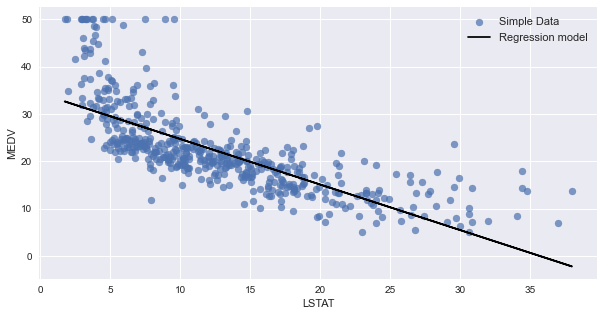

In [8]:
# обучим модель с помощью метода predict()

# предсказываем медианную цену для всех участков из набора по одному признаку
y_predict = sgd_lr_lstat.predict(X) # метод можно использовать для всех признаков, нужно подать матрицу из всех признаков

# визуализируем через функцию
plot_regression_2d(X, y, y_predict)

Рассчитаем метрику $R^2$ для модели на одном признаке

In [9]:
print(f'R2 {metrics.r2_score(y, y_predict):.3f}')

R2 0.542


Обучим модель на полном наборе признаков

In [10]:
#Составляем список факторов (исключили целевой столбец)
features = boston_data.drop('MEDV', axis=1).columns
#Составляем матрицу наблюдений X и вектор ответов y
X = boston_data[features]
y = boston_data['MEDV']

In [11]:
#Создаём объект класса линейной регрессии с SGD
sgd_lr_full = linear_model.SGDRegressor(random_state=42)
#Обучаем модель — ищем параметры по методу SGD
sgd_lr_full.fit(X, y)

SGDRegressor(random_state=42)

In [12]:
#Составляем таблицу из признаков и их коэффициентов
w_df = pd.DataFrame({'Features': features, 'Coefficients': sgd_lr_full.coef_})
#Составляем строчку таблицы со свободным членом
intercept_df =pd.DataFrame({'Features': ['INTERCEPT'], 'Coefficients': sgd_lr_full.intercept_})
coef_df = pd.concat([w_df, intercept_df], ignore_index=True)
display(coef_df)

,Features,Coefficients
0,CRIM,2.156857e+11
1,ZM,1.248446e+10
2,INDUS,7.277644e+09
3,CHAS,8.306154e+09
4,NOX,-8.413828e+09
5,RM,-3.148182e+10
6,AGE,8.685820e+10
7,DIS,-2.256141e+11
8,RAD,-4.683208e+10
9,TAX,1.892286e+09


Все коэффициенты имеют запредельные значения (9-11 степени числа 10). Это типичная картина расходящегося градиентного спуска: алгоритм не достиг точки минимума по каким-то причинам. Такие высокие значения коэффициентов означают, что модель является неустойчивой.

Рассчитаем метрику $R^2$ для модели на всех признаках

In [13]:
#Предсказываем медианную цену для всех участков из набора данных
y_predict = sgd_lr_full.predict(X)
#Рассчитываем коэффициент детерминации
print('R2 score: {:.3f}'.format(metrics.r2_score(y, y_predict)))

R2 score: -10590303862129979358707712.000


Отрицательный $R^2$ говорит о том, что модель абсолютно не описывает зависимости в данных.
<br>Причина в отсутсвии масштабировании данных

Стандартизируем данные классом StandardScaler из модуля preprocessing библиотеки sklearn

In [14]:
from sklearn import preprocessing

# Инициализируем стандартизатор StandartScaler
scaler = preprocessing.StandardScaler()

# Производим стандартизацию
X_scaler = scaler.fit_transform(X)

# Просмотрим результат стандартизации дата-сета
X_scaler = pd.DataFrame(X_scaler, columns=features)
X_scaler.head()

,CRIM,ZM,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


In [15]:
# Просмотрим описание дата-сета

X_scaler.describe()

,CRIM,ZM,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,506.000000,5.060000e+02,5.060000e+02,5.060000e+02
mean,-1.123388e-16,7.898820e-17,2.106352e-16,-3.510587e-17,-1.965929e-16,-1.088282e-16,-1.474446e-16,-8.425408e-17,-1.123388e-16,0.000000,-4.212704e-16,-7.442444e-16,-3.089316e-16
std,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990,1.000990e+00,1.000990e+00,1.000990e+00
min,-4.197819e-01,-4.877224e-01,-1.557842e+00,-2.725986e-01,-1.465882e+00,-3.880249e+00,-2.335437e+00,-1.267069e+00,-9.828429e-01,-1.313990,-2.707379e+00,-3.907193e+00,-1.531127e+00
25%,-4.109696e-01,-4.877224e-01,-8.676906e-01,-2.725986e-01,-9.130288e-01,-5.686303e-01,-8.374480e-01,-8.056878e-01,-6.379618e-01,-0.767576,-4.880391e-01,2.050715e-01,-7.994200e-01
50%,-3.906665e-01,-4.877224e-01,-2.110985e-01,-2.725986e-01,-1.442174e-01,-1.084655e-01,3.173816e-01,-2.793234e-01,-5.230014e-01,-0.464673,2.748590e-01,3.811865e-01,-1.812536e-01
75%,7.396560e-03,4.877224e-02,1.015999e+00,-2.725986e-01,5.986790e-01,4.827678e-01,9.067981e-01,6.623709e-01,1.661245e+00,1.530926,8.065758e-01,4.336510e-01,6.030188e-01
max,9.933931e+00,3.804234e+00,2.422565e+00,3.668398e+00,2.732346e+00,3.555044e+00,1.117494e+00,3.960518e+00,1.661245e+00,1.798194,1.638828e+00,4.410519e-01,3.548771e+00


Обучение модели со стандартизированными значениями

In [16]:
#Создаём объект класса линейной регрессии с SGD
sgd_lr_full = linear_model.SGDRegressor(random_state=42)
#Обучаем модель — ищем параметры по методу SGD
sgd_lr_full.fit(X_scaler, y)

SGDRegressor(random_state=42)

In [17]:
#Составляем таблицу из признаков и их коэффициентов
w_df = pd.DataFrame({'Features': features, 'Coefficients': sgd_lr_full.coef_})
#Составляем строчку таблицы со свободным членом
intercept_df =pd.DataFrame({'Features': ['INTERCEPT'], 'Coefficients': sgd_lr_full.intercept_})
coef_df = pd.concat([w_df, intercept_df], ignore_index=True)
display(coef_df)

,Features,Coefficients
0,CRIM,-0.870552
1,ZM,0.947112
2,INDUS,-0.116802
3,CHAS,0.730289
4,NOX,-1.894276
5,RM,2.757578
6,AGE,-0.027846
7,DIS,-3.049237
8,RAD,1.957066
9,TAX,-1.305271


Рассчитаем метрику $R^2$ для модели на всех стандартизированных признаках

In [18]:
#Предсказываем медианную цену для всех участков из набора данных
y_predict = sgd_lr_full.predict(X)
#Рассчитываем коэффициент детерминации
print('R2 score: {:.3f}'.format(metrics.r2_score(y, y_predict)))

R2 score: -1856.503


У класса SGDRegressor, помимо random_state, есть ещё множество различных внешних параметров, которые можно настраивать. Со всем списком вы можете ознакомиться в документации <https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html>
<br>Обучим модель с использованием настроек.

In [19]:
# Создаём объект класа линейной регрессии SGD
sgd_lr_bad = linear_model.SGDRegressor(
    learning_rate='constant', # режим темпа обучения - константа
    eta0=0.1, # начальное и постоянное значение темпа обучения 0.1
    random_state=42 # для воспроизводимости эксперимента при разных значениях
)

# Обучаем модель - ищем параметры по методу SGD
sgd_lr_bad.fit(X_scaler, y)

# предсказываем медианную цену для всех участков в дата-сете
# загружаем стандартизированные данные
y_predict=sgd_lr_bad.predict(X_scaler)

# рассчитываем коэфф. детерминации R2
print('R2 score: {:.3f}'.format(metrics.r2_score(y, y_predict)))

R2 score: -335415038359.635


$R^2$ < 0, то есть SGD разошёлся из-за слишком высокого темпа обучения. Необходимо уменьшить значение eta0

In [20]:
# Создаём объект класа линейной регрессии SGD
sgd_lr_bad = linear_model.SGDRegressor(
    learning_rate='constant', # режим темпа обучения - константа
    eta0=1e-6, # начальное и постоянное значение темпа обучения 0.1
    random_state=42 # для воспроизводимости эксперимента при разных значениях
)

# Обучаем модель - ищем параметры по методу SGD
sgd_lr_bad.fit(X_scaler, y)

# предсказываем медианную цену для всех участков в дата-сете
# загружаем стандартизированные данные
y_predict=sgd_lr_bad.predict(X_scaler)

# рассчитываем коэфф. детерминации R2
print('R2 score: {:.3f}'.format(metrics.r2_score(y, y_predict)))

R2 score: -1.578


c:\Users\dmitr\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


$R^2$ < 0 снова. Так же вышло предупреждение, что алгоритму не хватило кол-ва итераций max_iter, чтобы дойти до минимума. Это произошло по причине слишком низкой скорости обучения.

Задание 4.9
<br>Найдите в документации <https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html> параметр, отвечающий на критерий остановки (по умолчанию он равен 0.001).
<br>Обучите SGDRegressor на датасете о домах в Бостоне с параметром остановки, равным 0.1, и random_state = 42. Остальные параметры оставьте по умолчанию.
<br>Рассчитайте коэффициент детерминации $R^2$. Ответ округлите до третьего знака после точки-разделителя. Сделайте вывод по полученным результатам.

In [42]:
# Создаём объект класа линейной регрессии SGD
sgd_lr_bad = linear_model.SGDRegressor(
    #learning_rate='constant', # режим темпа обучения - константа
    #eta0=1e-6, # начальное и постоянное значение темпа обучения 0.1
    tol=0.1,
    random_state=42 # для воспроизводимости эксперимента при разных значениях
)

# Обучаем модель - ищем параметры по методу SGD
sgd_lr_bad.fit(X_scaler, y)

# предсказываем медианную цену для всех участков в дата-сете
# загружаем стандартизированные данные
y_predict=sgd_lr_bad.predict(X_scaler)

# рассчитываем коэфф. детерминации R2
print('R2 score: {:.3f}'.format(metrics.r2_score(y, y_predict)))

R2 score: 0.735
